### Transformation of Features
- Why Transformation of Features Are Required?

features may have different units. Some Large some small which brings can lead to miscalculation and low accuracy. By applying different transformations, machine learning models can be made more effective, interpretable, and robust, ultimately leading to better performance and insights from the data.

1) Linear Regression---Gradient Descent ----Global Minima (scalability)
2) Algorithms like KNN,K Means,Hierarichal Clustering--- Eucledian Distance (similarity measurements)

- Every Point has some vectors and Directions.
- Deep Learning Techniques(Standardization, Scaling) 1.ANN--->GLobal Minima, Gradient 2.CNN 3.RNN
- Majorly used scalling method by DL is min-max scaling
- We will discuss different feature transformation technique.


### Types Of Transformation
1. Normalization And Standardization
2. Scaling to Minimum And Maximum values
3. Scaling To Median And Quantiles
4. Guassian Transformation
5. Logarithmic Transformation
6. Reciprocal Trnasformation
7. Square Root Transformation
8. Exponential Trnasformation
9. Box Cox Transformation

In [32]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [33]:
df1 = df[['survived','pclass','age','fare']].copy()
df1.head()

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [34]:
df1['age'].fillna(df1.age.median(),inplace=True)

In [35]:
df1.isnull().sum()

survived    0
pclass      0
age         0
fare        0
dtype: int64

In [36]:
X = df1.iloc[:,1:]
y = df1.iloc[:,0]

In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=30,test_size=0.3)

### 1. Normalization and Standardization
- No range all units are brought in one suitable range.
- Standardization is a feature transformation technique used to rescale the features of a dataset so that they have a mean of zero and a standard deviation of one. This is crucial for many machine learning algorithms that assume or perform better when the input data is centered around zero and has a consistent scale.
- Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units (e.g., Pounds, Meters, Miles … etc).
- We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero. z=(x-x_mean)/std



In [38]:
from sklearn.preprocessing import StandardScaler

# Use fit_transform with train data to get mean as 0 and std as 1.
# do not use fit with test as we need to proceed with same mean and std for test data.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  

In [39]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train_scaled,y_train)

LogisticRegression()

In [40]:
y_pred = classifier.predict(X_test_scaled)

## Standardization on whole data

In [41]:
df_scaled = scaler.fit(df1)
df_scaled

StandardScaler()

In [42]:
df_scaled=df_scaled.transform(df1)
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

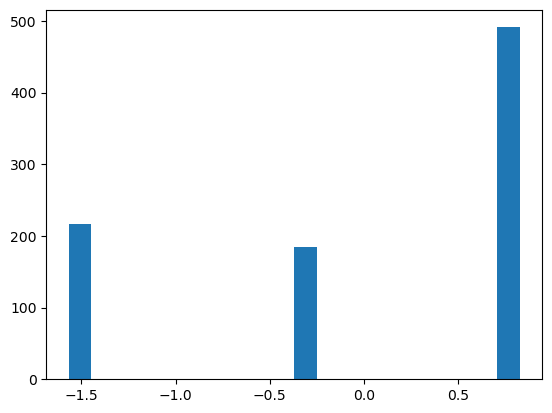

In [46]:
plt.hist(df_scaled[:,1],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

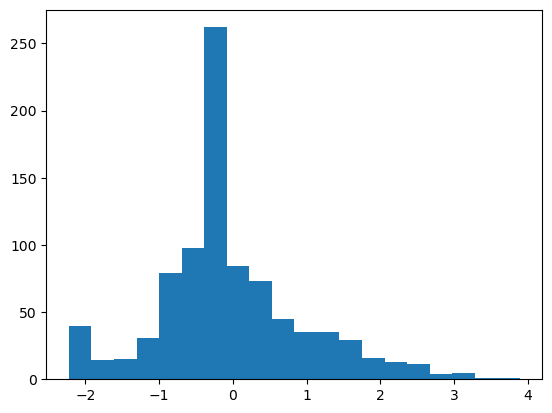

In [50]:
plt.hist(df_scaled[:,2],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

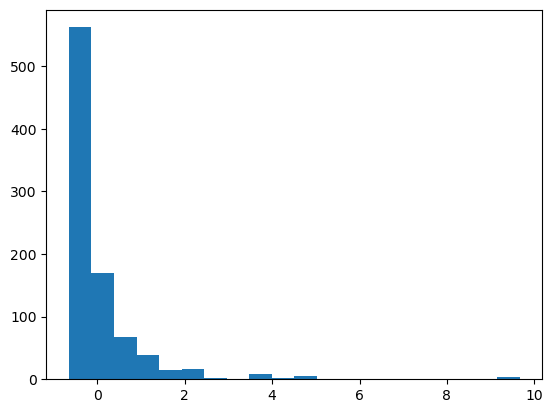

In [51]:
plt.hist(df_scaled[:,3],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

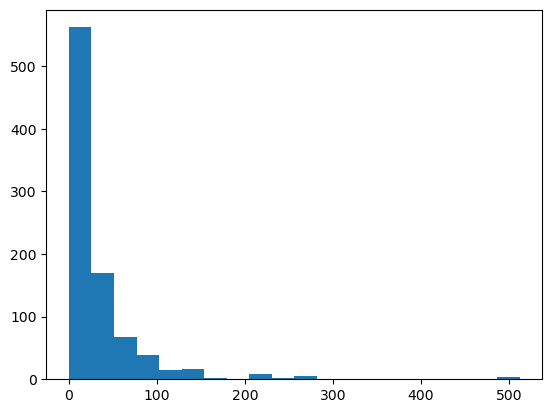

In [53]:
plt.hist(df1['fare'],bins=20)

### - We drawn histogram for scaled fair column and unscaled fare column and both show same graph

### 2. MinMax Scalling
- Mainly used for scalling DL algorithms
- All the features will be reduced between 0 to 1 range.
- X_scaled = (X - X.min / (X.max - X.min)

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [108]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_train_minmax=pd.DataFrame(min_max.fit_transform(X_train),columns=X.columns)
df_test_minmax=pd.DataFrame(min_max.transform(X_test))
df_train_minmax.head()

,pclass,age,fare
0,0.0,0.673285,0.101229
1,1.0,0.346569,0.030254
2,0.5,0.308872,0.081157
3,1.0,0.321438,0.028213
4,1.0,0.271174,0.020527


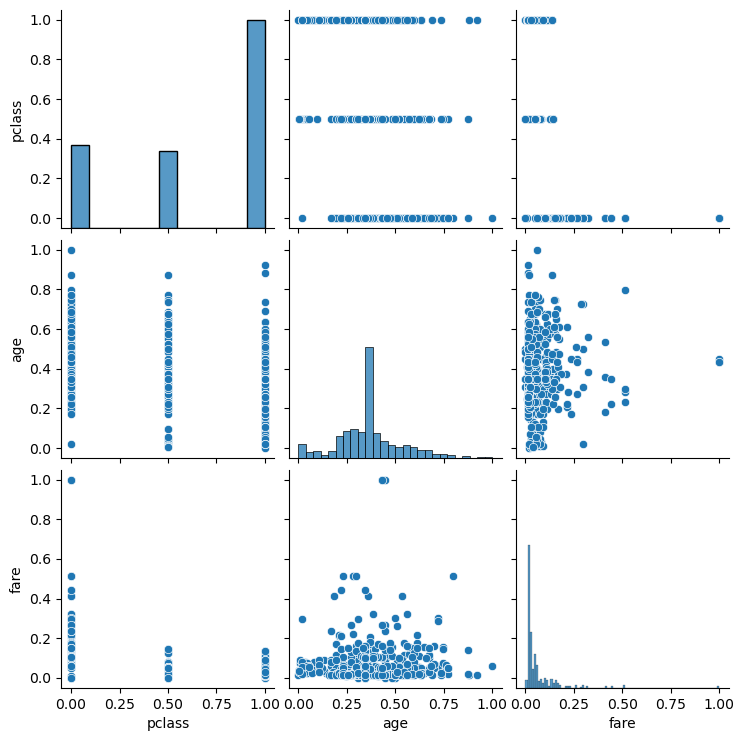

In [88]:
sns.pairplot(df_train_minmax)

(array([384., 106.,  51.,  24.,   8.,   9.,   2.,   0.,   5.,   0.,   4.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

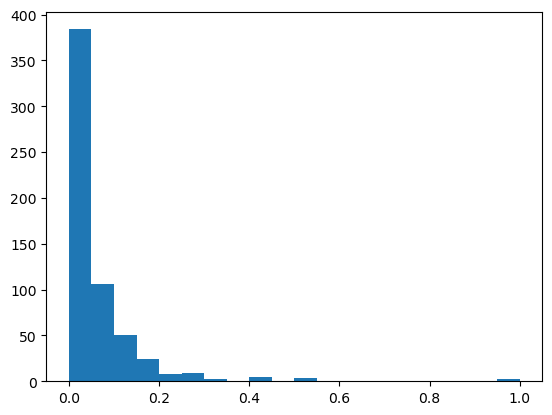

In [91]:
plt.hist(df_train_minmax['fare'],bins=20)

(array([135.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 125.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 336.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

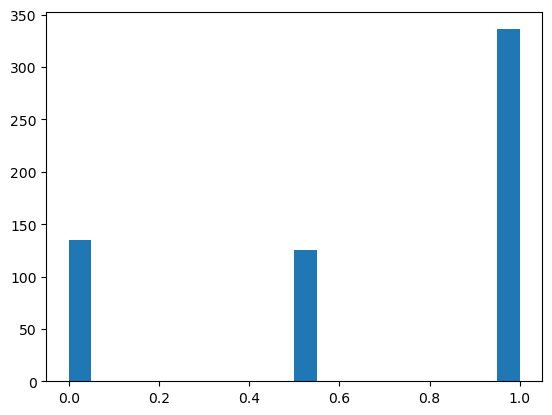

In [118]:
plt.hist(df_train_minmax['pclass'],bins=20)

(array([ 29.,   9.,   9.,  23.,  50.,  63., 180.,  56.,  50.,  25.,  24.,
         27.,  16.,  15.,  10.,   5.,   0.,   3.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

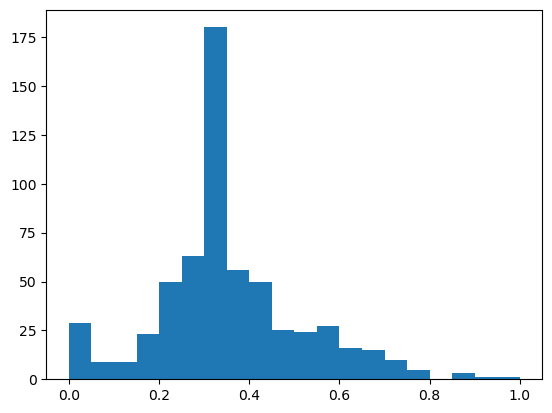

In [119]:
plt.hist(df_train_minmax['age'],bins=20)

## Minmax scale on whole data at time. But this increase rate of overfitting

In [67]:
min_max.fit(df1)
df_scaled = min_max.transform(df1)

In [74]:
df_scaled = pd.DataFrame(df_scaled, columns=df1.columns)
# Optionally, add the target column back if needed
df_scaled['survived'] = y.values
df_scaled

,survived,pclass,age,fare
0,0,1.0,0.271174,0.014151
1,1,0.0,0.472229,0.139136
2,1,1.0,0.321438,0.015469
3,1,0.0,0.434531,0.103644
4,0,1.0,0.434531,0.015713
...,...,...,...,...
886,0,0.5,0.334004,0.025374
887,1,0.0,0.233476,0.058556
888,0,1.0,0.346569,0.045771
889,1,0.0,0.321438,0.058556


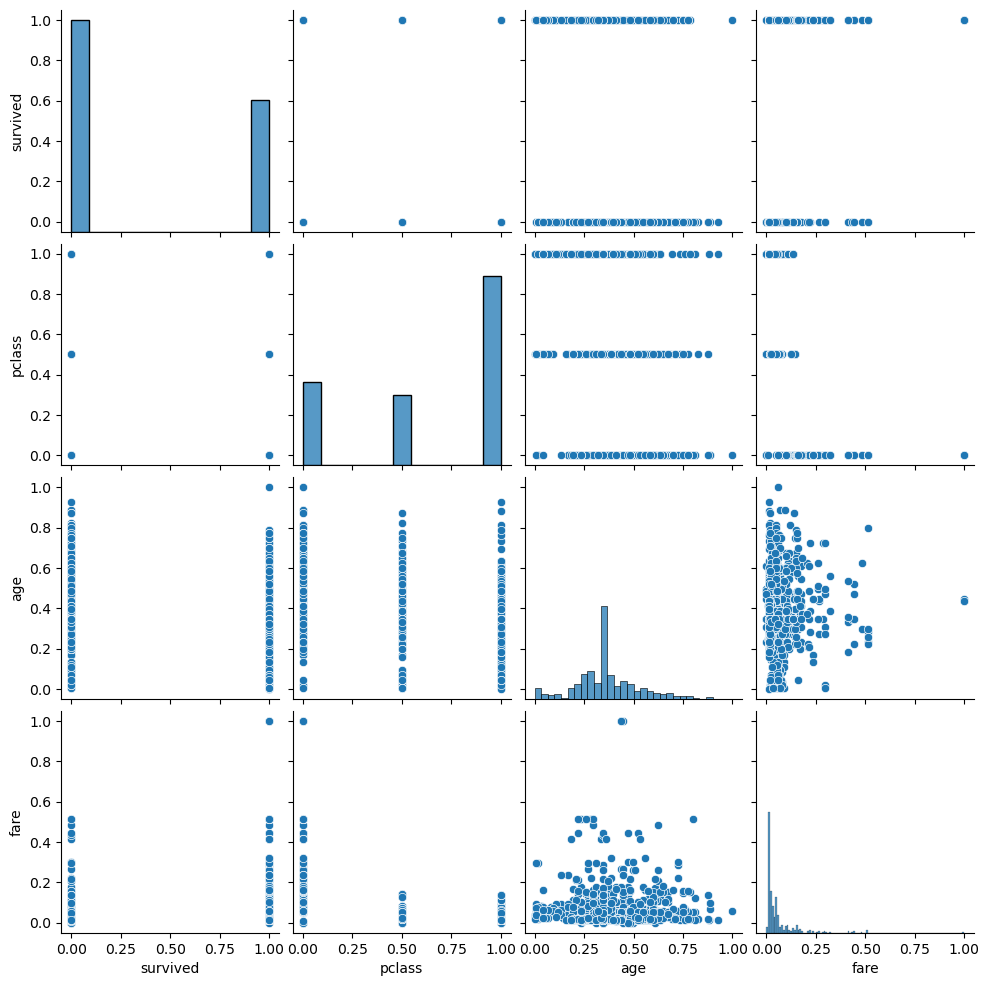

In [75]:
sns.pairplot(df_scaled)

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

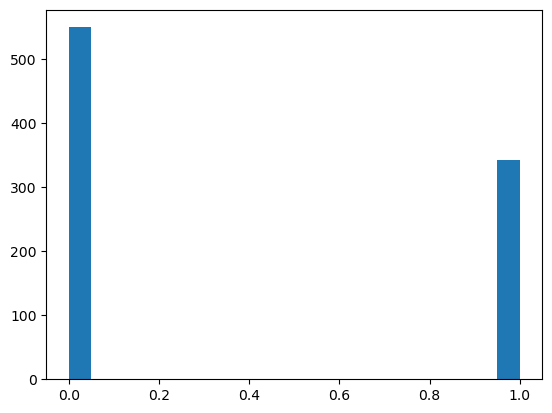

In [73]:
import matplotlib.pyplot as plt
plt.hist(df_scaled['survived'],bins=20)

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

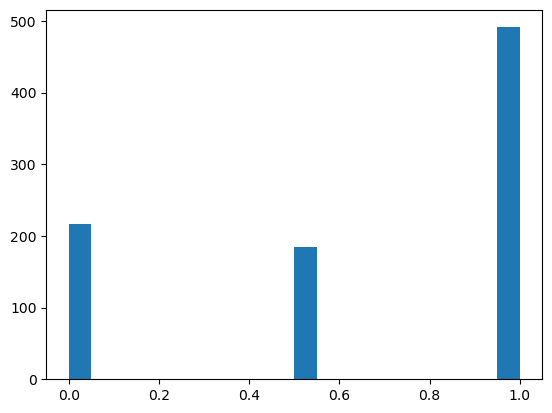

In [76]:
plt.hist(df_scaled['pclass'],bins=20)

(array([ 29.,   9.,   9.,  23.,  50.,  63., 180.,  56.,  50.,  25.,  24.,
         27.,  16.,  15.,  10.,   5.,   0.,   3.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

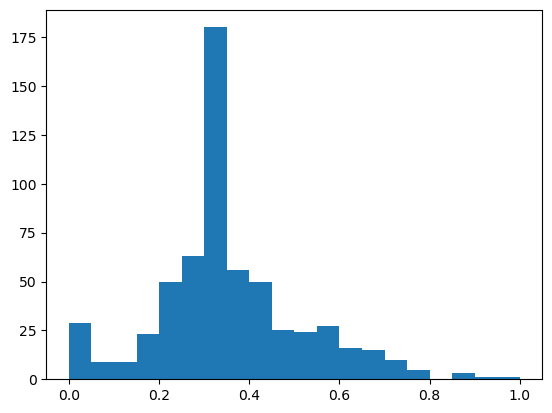

In [95]:
plt.hist(df_train_minmax['age'],bins=20)

(array([384., 106.,  51.,  24.,   8.,   9.,   2.,   0.,   5.,   0.,   4.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

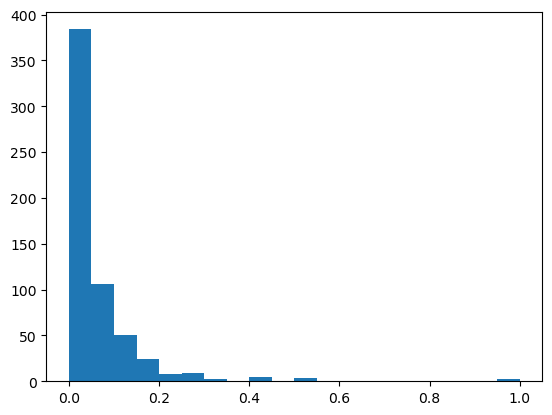

In [96]:
plt.hist(df_train_minmax['fare'],bins=20)

## Robust Scaler
- Name comes as this type scaling is robust to outliers.
- It scaled down features based on median and quartile.
- I
IQR = 75th quantile - 25th quantil- X_scaled = (X - X.median) / IQR
  eIQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less than 1 4-40%

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [111]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X.columns)
df_robust_scaler_test=pd.DataFrame(scaler.transform(X_test))

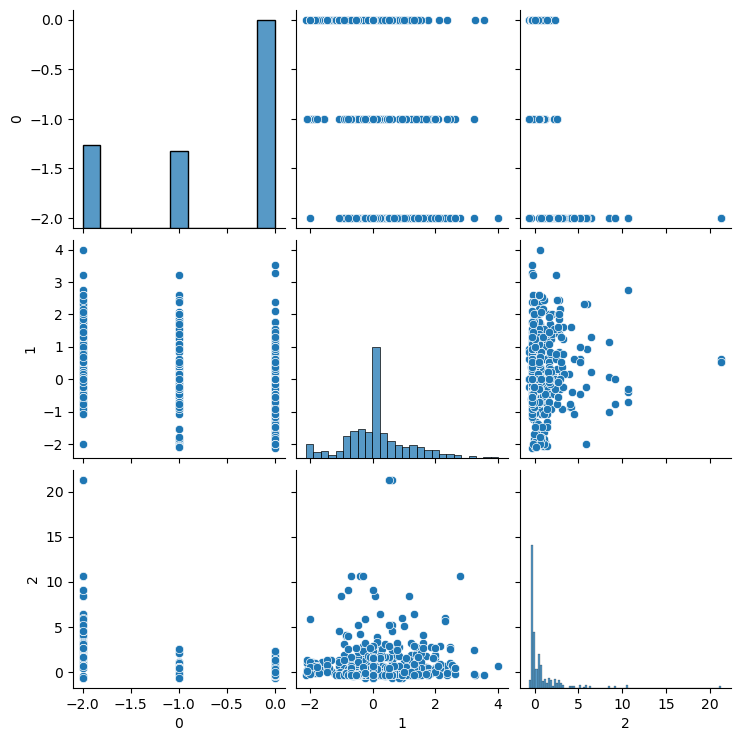

In [112]:
import seaborn as sns
sns.pairplot(df_robust_scaler)

(array([ 29.,   9.,   9.,  23.,  50.,  63., 180.,  56.,  50.,  25.,  24.,
         27.,  16.,  15.,  10.,   5.,   0.,   3.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

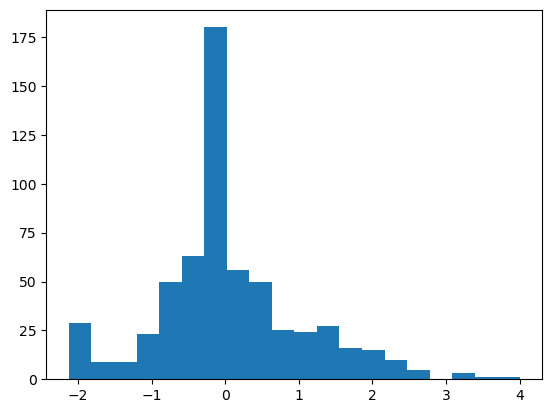

In [114]:
plt.hist(df_robust_scaler_train['age'],bins=20)

(array([135.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 125.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 336.]),
 array([-2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. ,
        -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <BarContainer object of 20 artists>)

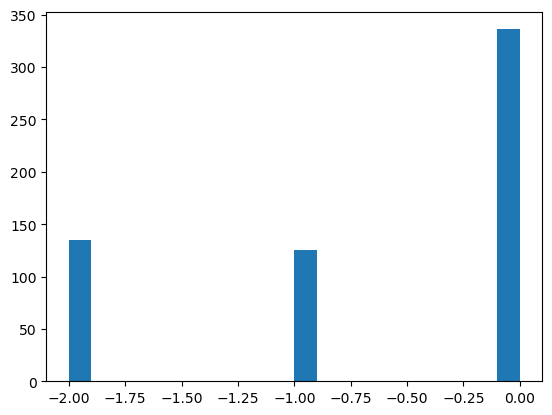

In [115]:
plt.hist(df_robust_scaler_train['pclass'],bins=20)

(array([384., 106.,  51.,  24.,   8.,   9.,   2.,   0.,   5.,   0.,   4.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.61902355,  0.47804111,  1.57510578,  2.67217045,  3.76923512,
         4.86629979,  5.96336445,  7.06042912,  8.15749379,  9.25455846,
        10.35162313, 11.44868779, 12.54575246, 13.64281713, 14.7398818 ,
        15.83694647, 16.93401113, 18.0310758 , 19.12814047, 20.22520514,
        21.32226981]),
 <BarContainer object of 20 artists>)

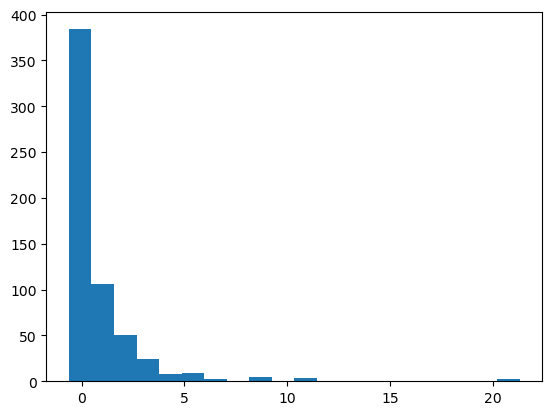

In [116]:
plt.hist(df_robust_scaler_train['fare'],bins=20)

## Gaussian Transformation
- Some Machine Learning algorithms like linear and logistic assume that data is normally distributed and can calculate accuracy.
- Here are some common methods to achieve Gaussian transformation:
  1. Logarithmic Transformation
  2. Reciprocal Transformation
  3. Square Root Transformation
  4. Exponential Transformation (Any type of exponential values)
  5. BoxCox Transformation

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab 

In [139]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [140]:
df1 = df[['survived','pclass','age','fare']].copy()
df1.head()

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [141]:
df1['age']=df1['age'].fillna(df1['age'].median())

In [144]:
df1.isna().sum()

survived    0
pclass      0
age         0
fare        0
dtype: int64

## Q-Q plot
- Used to check the distribution of data - to check whether follows normal distribution or not

In [154]:
def plot_data(data,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()

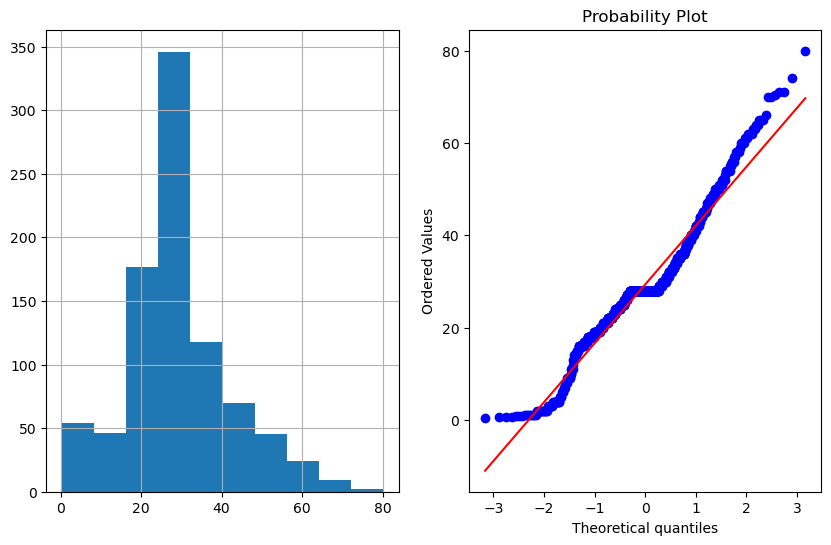

In [155]:
plot_data(df1,'age')

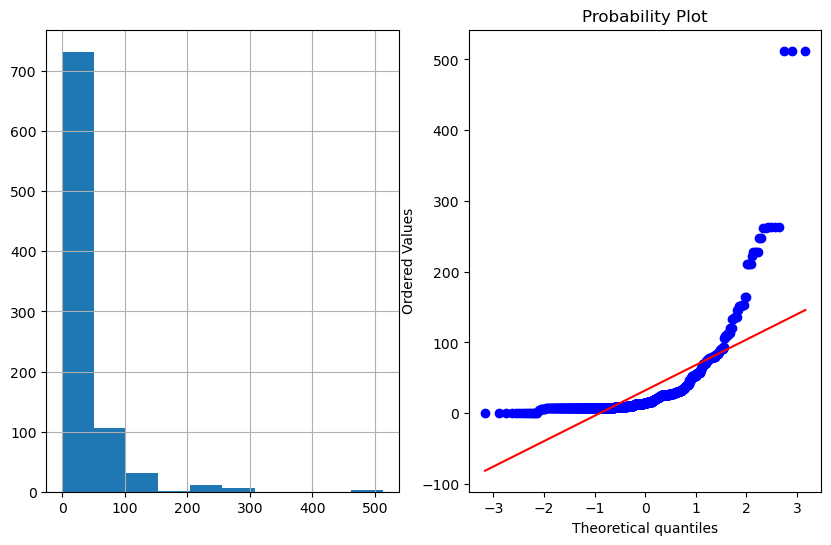

In [178]:
plot_data(df1,'fare')

## Logarithmic Transformation
Log transformation can help in making data more normally distributed, especially when dealing with positively skewed data.

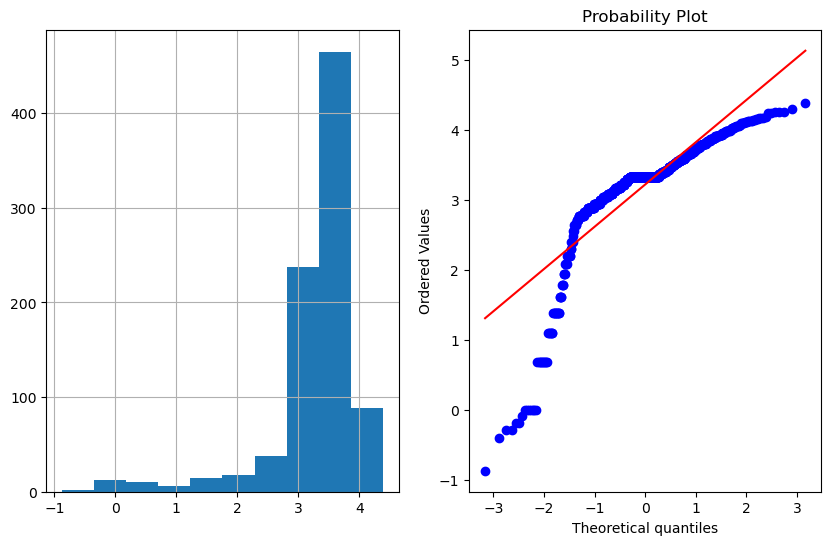

In [159]:
df1['age_log']=np.log(df1['age'])
plot_data(df1,'age_log')

## Reciprocal Tranformation

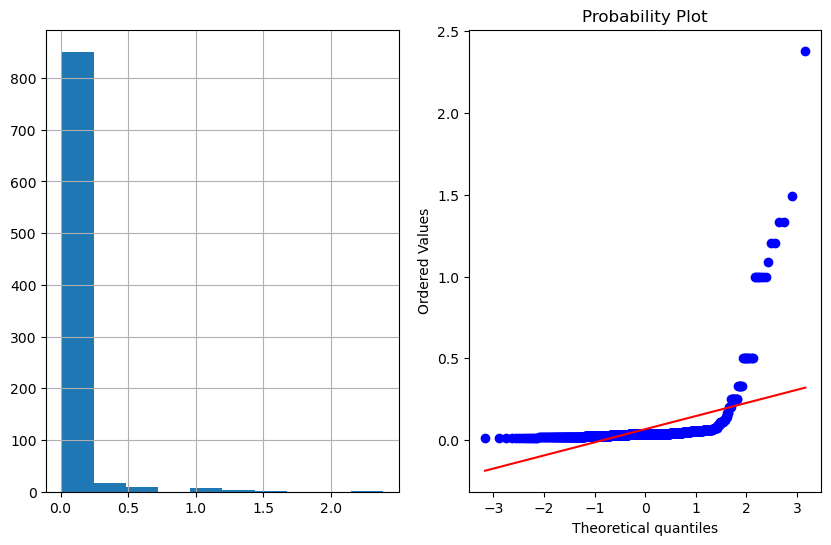

In [162]:
df1['age_rec']=1/df1['age']
plot_data(df1,'age_rec')

## Square Root Transformation
Square root transformation is another technique to reduce skewness in the data.

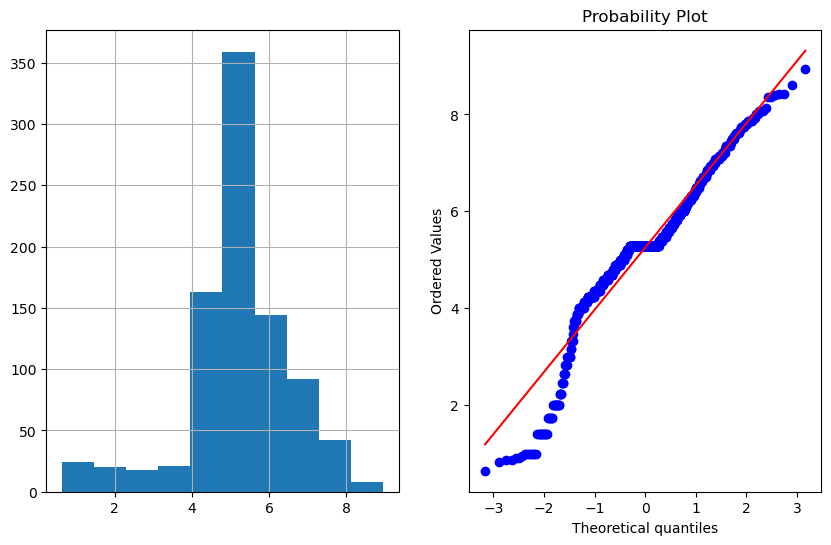

In [163]:
df1['age_rec']=df1['age']**(1/2)
plot_data(df1,'age_rec')

## Exponential Transformation

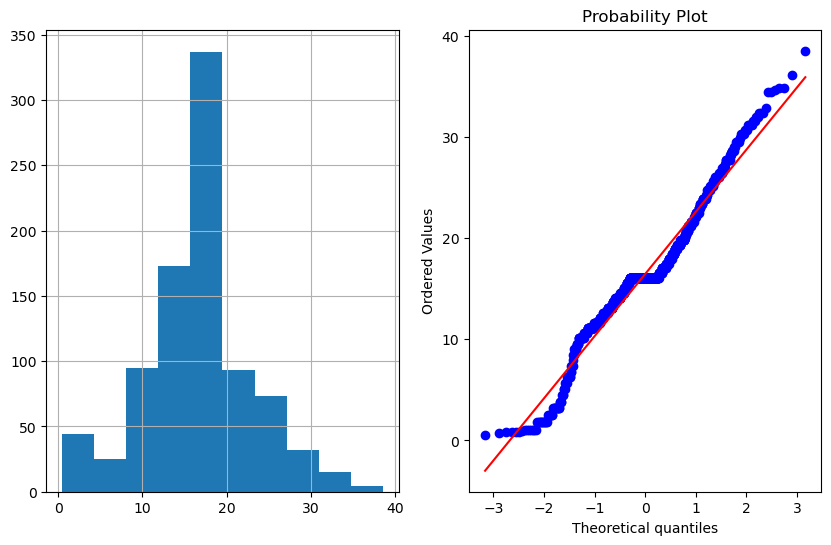

In [164]:
df1['age_rec']=df1['age']**(1/1.2)
plot_data(df1,'age_rec')

## BoxCox Transformation
- The Box-Cox transformation is a more generalized transformation that can handle both positive and negative skewness.
- The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

- where Y is the response variable and λ is the transformation parameter.
- λ varies from -5 to 5.
- In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [167]:
df1['age_boxcox'],parameter=stat.boxcox(df1['age'])
print(parameter)

0.7964531473656952


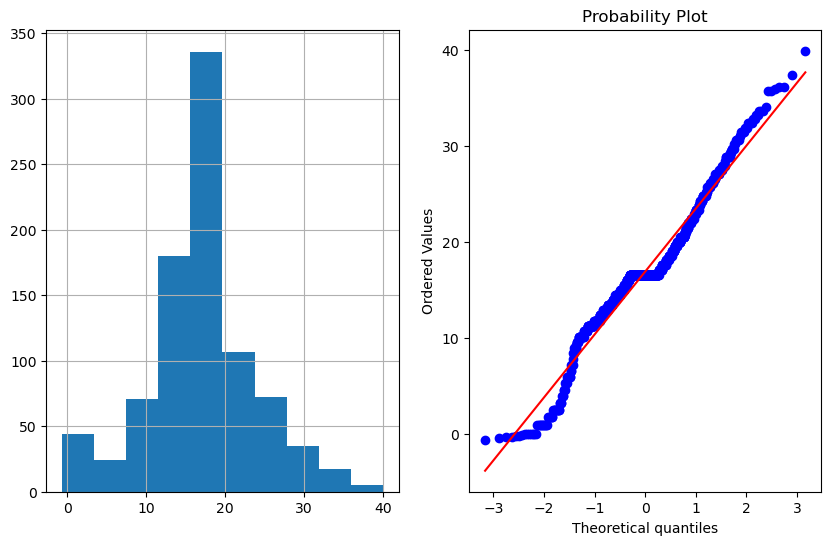

In [168]:
plot_data(df1,'age_boxcox')

## Natural Logarithm of one plus
The transformation applied with np.log1p is known as the natural logarithm of one plus the input value. This transformation is particularly useful when dealing with data that includes zero values, as it handles the zero value without resulting in negative infinity (which would happen with a regular logarithm

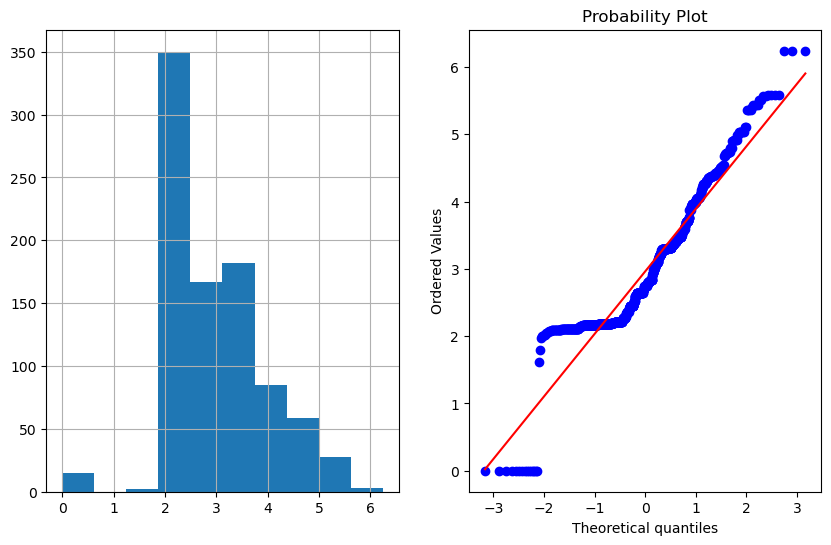

In [176]:
df1['fare_log']=np.log1p(df1['fare'])
plot_data(df1,'fare_log')

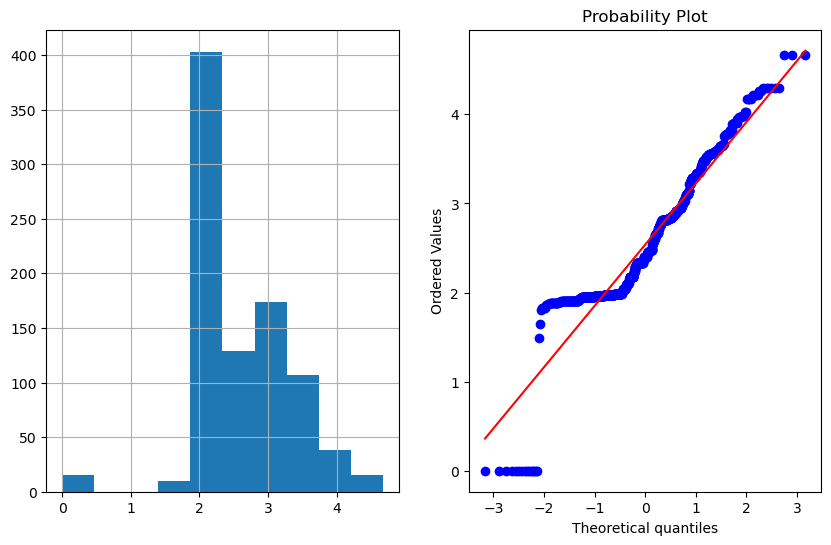

In [173]:
# Other method to avoid negative fare value add 1
df1['fare_boxcox'],parameter=stat.boxcox(df1['fare']+1)
plot_data(df1,'fare_boxcox')